# **TOPIC:MACHINE LEARNING MODEL FOR CANCER DATASET UAE**

NAME: UTHIRA NAGAVEL S
                                                             
                                                              
                                                               
DEPARTMENT: ARTIFICIAL INTELLIGENCE AND DATA SCIENCE

YEAR : III- year

# **PROBLEM STATEMENT**


Cancer remains a major public health concern worldwide, including in
the UAE. This project aims to analyze the cancer dataset from the UAE to identify trends, assess risk factors, and build predictive models for cancer diagnosis.

# **OBJECTIVES**



*  To Handle missing values, duplicates, and perform necessary preprocessing.
* To Analyze the distribution of cancer types across age groups, gender, and nationality.
* To  Evaluate temporal trends in cancer incidence over the years (if year-wise data is present).
* To Develop a simple model to predict cancer type based on available features such as age, gender, and nationality.





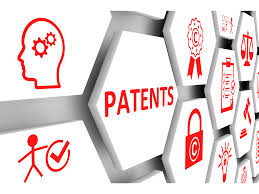

# **IMPORT NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# **IMPORT THE DATA**

In [ ]:
data=pd.read_csv('/content/_cancer_dataset_uae.csv')

# **MAKING DATA FRAME**

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193


In [ ]:
df.head(6)

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
5,PAT000006,41,Female,Emirati,Abu Dhabi,2015-02-10,Breast,I,Surgery,2015-04-21,Dubai Hospital,Dr. ZL30,Recovered,NaN,NaN,Smoker,Hypertension,European,59,176


In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height'],
      dtype='object')

In [ ]:
df.describe()

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


In [ ]:
df.shape

(10000, 20)

# **HANDLING THE MISSING VALUES**

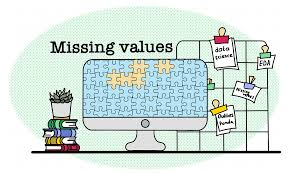

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Nationality,0
Emirate,0
Diagnosis_Date,0
Cancer_Type,0
Cancer_Stage,0
Treatment_Type,0
Treatment_Start_Date,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [ ]:
df.dropna()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
17,PAT000018,75,Female,Emirati,Umm Al Quwain,2022-01-10,Ovarian,I,Immunotherapy,2022-05-03,Sheikh Khalifa Hospital,Dr. WC13,Deceased,2022-08-01 00:00:00,Cancer,Smoker,Hypertension,South Asian,56,169
54,PAT000055,71,Male,Emirati,Fujairah,2022-04-18,Liver,I,Radiation,2022-07-11,Dubai Hospital,Dr. LB12,Deceased,2023-05-18 00:00:00,Cancer,Non-Smoker,Hypertension,European,39,178
67,PAT000068,57,Male,Emirati,Umm Al Quwain,2020-04-21,Pancreatic,III,Surgery,2020-08-12,Dubai Hospital,Dr. FF49,Deceased,2022-07-29 00:00:00,Cancer,Smoker,Cardiovascular Disease,South Asian,95,168
85,PAT000086,52,Male,Emirati,Umm Al Quwain,2015-12-10,Liver,III,Immunotherapy,2016-05-10,Sheikh Khalifa Hospital,Dr. IE11,Deceased,2018-04-15 00:00:00,Cancer,Non-Smoker,Diabetes,Arab,70,182
91,PAT000092,89,Female,Emirati,Ajman,2020-04-16,Ovarian,III,Surgery,2020-07-14,Dubai Hospital,Dr. WN20,Deceased,2020-09-18 00:00:00,Complications,Non-Smoker,Hypertension,European,67,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,PAT009959,87,Male,Emirati,Dubai,2019-12-10,Pancreatic,III,Chemotherapy,2020-04-07,Sheikh Khalifa Hospital,Dr. DM1,Deceased,2021-10-25 00:00:00,Cancer,Former Smoker,Hypertension,South Asian,95,172
9964,PAT009965,79,Female,Emirati,Ajman,2016-06-07,Colorectal,II,Chemotherapy,2016-06-29,Dubai Hospital,Dr. HS39,Deceased,2017-05-30 00:00:00,Complications,Non-Smoker,Hypertension,East Asian,82,171
9979,PAT009980,49,Male,Emirati,Ajman,2018-01-15,Liver,I,Chemotherapy,2018-06-02,Zayed Military Hospital,Dr. HH28,Deceased,2019-08-02 00:00:00,Complications,Smoker,Hypertension,Arab,91,163
9982,PAT009983,54,Female,Emirati,Ras Al Khaimah,2019-06-21,Breast,III,Surgery,2019-10-23,Sheikh Khalifa Hospital,Dr. UT11,Deceased,2020-10-08 00:00:00,Complications,Smoker,Diabetes,African,49,167


# **HANDLE DUPLICATES**


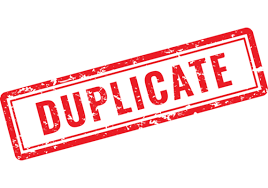

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Nationality,0
Emirate,0
Diagnosis_Date,0
Cancer_Type,0
Cancer_Stage,0
Treatment_Type,0
Treatment_Start_Date,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [ ]:
y=df['Outcome']
y

,Outcome
0,Recovered
1,Recovered
2,Under Treatment
3,Recovered
4,Recovered
...,...
9995,Recovered
9996,Under Treatment
9997,Under Treatment
9998,Recovered


In [ ]:
x=df.drop('Outcome',axis=1)

In [ ]:
x.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Death_Date',
       'Cause_of_Death', 'Smoking_Status', 'Comorbidities', 'Ethnicity',
       'Weight', 'Height'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

# **ENCODING**

In [ ]:
df_pandas_encoded=pd.get_dummies(df,columns=['Patient_ID', 'Gender', 'Nationality', 'Emirate','Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type','Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Death_Date','Cause_of_Death', 'Smoking_Status', 'Comorbidities', 'Ethnicity'],drop_first=True)

In [ ]:
encoder=OneHotEncoder(sparse_output=False)

In [ ]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Patient_ID',
 'Gender',
 'Nationality',
 'Emirate',
 'Diagnosis_Date',
 'Cancer_Type',
 'Cancer_Stage',
 'Treatment_Type',
 'Treatment_Start_Date',
 'Hospital',
 'Primary_Physician',
 'Outcome',
 'Death_Date',
 'Cause_of_Death',
 'Smoking_Status',
 'Comorbidities',
 'Ethnicity']

In [ ]:
one_hot_encoded=encoder.fit_transform(df[categorical_columns])

In [ ]:
one_hot_encoded_df=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:

df_sklearn_encoded=pd.concat([df.drop(categorical_columns,axis=1),one_hot_encoded_df],axis=1)

In [ ]:
df1=df_sklearn_encoded

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 25936 entries, Age to Ethnicity_South Asian
dtypes: float64(25933), int64(3)
memory usage: 1.9 GB


# **HANDLE OUTLIERS**

In [ ]:
#handling outliers
num_columns=df1.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
num_columns

['Age',
 'Weight',
 'Height',
 'Patient_ID_PAT000001',
 'Patient_ID_PAT000002',
 'Patient_ID_PAT000003',
 'Patient_ID_PAT000004',
 'Patient_ID_PAT000005',
 'Patient_ID_PAT000006',
 'Patient_ID_PAT000007',
 'Patient_ID_PAT000008',
 'Patient_ID_PAT000009',
 'Patient_ID_PAT000010',
 'Patient_ID_PAT000011',
 'Patient_ID_PAT000012',
 'Patient_ID_PAT000013',
 'Patient_ID_PAT000014',
 'Patient_ID_PAT000015',
 'Patient_ID_PAT000016',
 'Patient_ID_PAT000017',
 'Patient_ID_PAT000018',
 'Patient_ID_PAT000019',
 'Patient_ID_PAT000020',
 'Patient_ID_PAT000021',
 'Patient_ID_PAT000022',
 'Patient_ID_PAT000023',
 'Patient_ID_PAT000024',
 'Patient_ID_PAT000025',
 'Patient_ID_PAT000026',
 'Patient_ID_PAT000027',
 'Patient_ID_PAT000028',
 'Patient_ID_PAT000029',
 'Patient_ID_PAT000030',
 'Patient_ID_PAT000031',
 'Patient_ID_PAT000032',
 'Patient_ID_PAT000033',
 'Patient_ID_PAT000034',
 'Patient_ID_PAT000035',
 'Patient_ID_PAT000036',
 'Patient_ID_PAT000037',
 'Patient_ID_PAT000038',
 'Patient_ID_PAT0000

# **BOX PLOT**

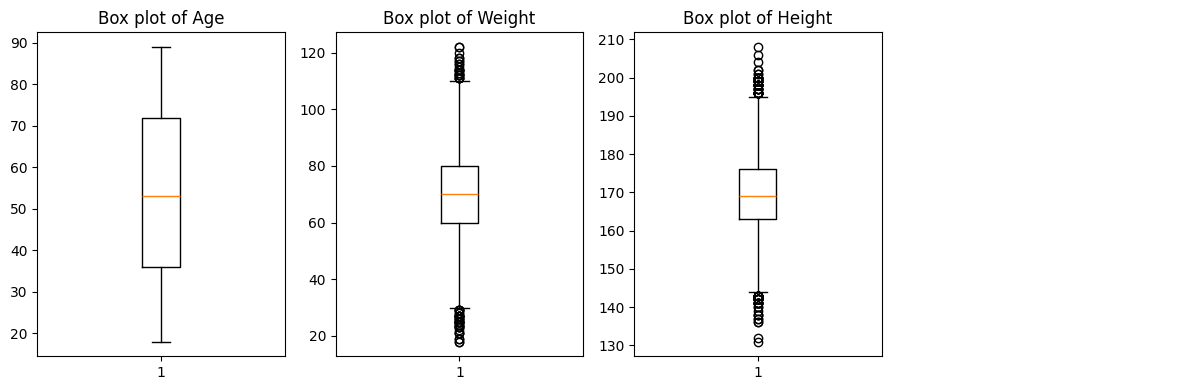

In [ ]:
count = 0

for idx, col in enumerate(df.select_dtypes(include=['number']).columns):
    if count == 0:
        fig, axs = plt.subplots(1, 4, figsize=(12, 4))  # New figure for every set of 3 plots

    axs[count].boxplot(df[col])
    axs[count].set_title(f"Box plot of {col}")
    count += 1

    if count == 4:
        plt.tight_layout()
        plt.show()
        count = 0
if count != 0:
    for i in range(count, 4):
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def handling_outliers(df):
  for col in df.select_dtypes(include='number').columns:
    # Access quantiles from df1 instead of df
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    Lower_bound=q1-1.5*iqr
    Upper_bound=q3+1.5*iqr
    # Apply changes to df1 instead of df
    df[col]=df[col].apply(lambda x:Lower_bound if x<Lower_bound else Upper_bound if x> Upper_bound else x)
  return df1 # Return the modified df1

In [ ]:
df2 =handling_outliers(df)
print(df2.head(5))


   Age  Weight  Height  Patient_ID_PAT000001  Patient_ID_PAT000002  \
0   69      61     157                   1.0                   0.0   
1   32      80     175                   0.0                   1.0   
2   89      50     175                   0.0                   0.0   
3   78      44     155                   0.0                   0.0   
4   38     101     160                   0.0                   0.0   

   Patient_ID_PAT000003  Patient_ID_PAT000004  Patient_ID_PAT000005  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   0.0                   0.0                   1.0   

   Patient_ID_PAT000006  Patient_ID_PAT000007  ...  Smoking_Status_Smoker  \
0                   0.0                   0.0  ...                    0.0  

# **VISUALIZATION**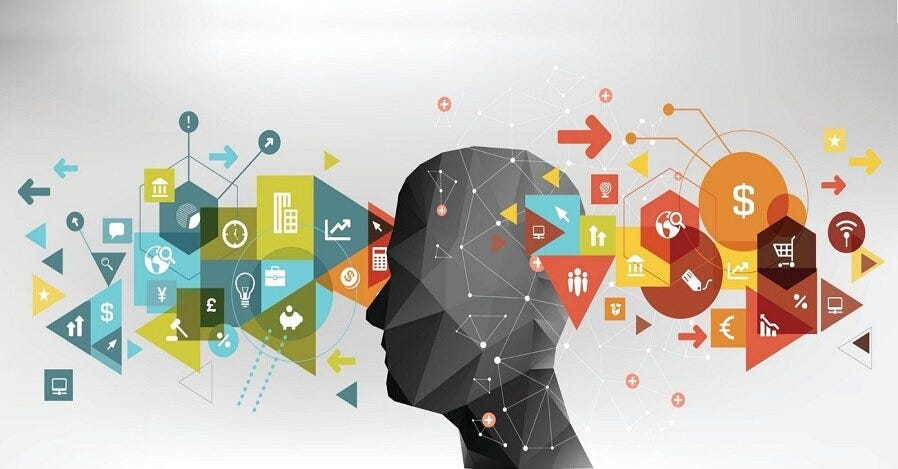

# **K- DENSITY PLOT WITH HISTOGRAM**

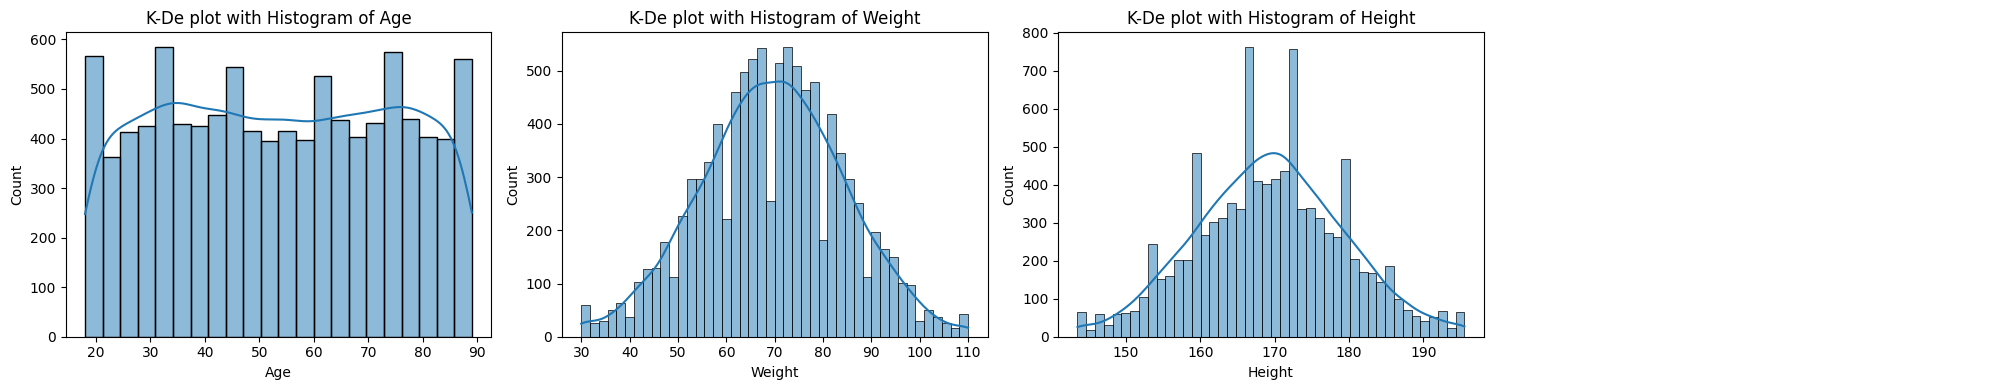

In [ ]:
count = 0

for idx, col in enumerate(df.select_dtypes(include=['number']).columns):
    if count == 0:
        fig, axs = plt.subplots(1, 4, figsize=(20, 4))  # New figure for every set of 4 plots

    sns.histplot(df[col], kde=True, ax=axs[count])
    axs[count].set_title(f"K-De plot with Histogram of {col}")
    count += 1

    if count == 4:
        plt.tight_layout()
        plt.show()
        count = 0
if count != 0:
    for i in range(count, 4):
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

# **SCATTER PLOT**

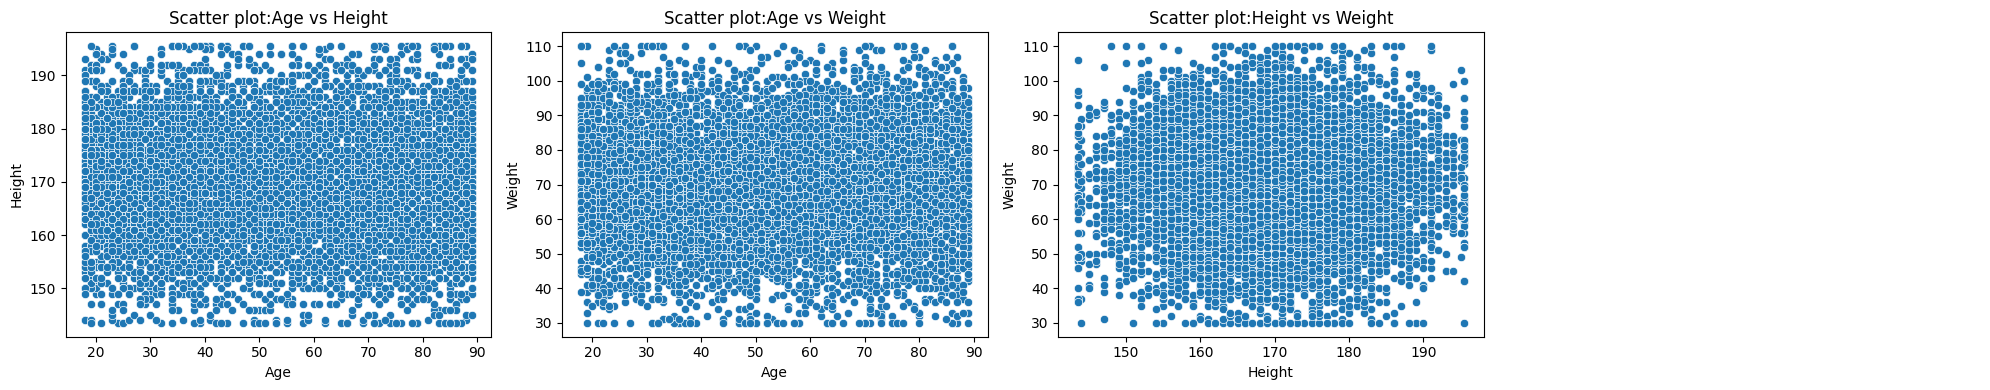

In [ ]:
count = 0
a=['Age','Height','Weight']
for i in range(len(a)):
  for j in range(i+1,len(a)):
      if count == 0:
          fig, axs = plt.subplots(1, 4, figsize=(20, 4))  # New figure for every set of 4 plots

      sns.scatterplot(x=df[a[i]], y=df[a[j]], ax=axs[count])
      axs[count].set_title(f"Scatter plot:{a[i]} vs {a[j]}")
      count += 1

      if count == 4:
          plt.tight_layout()
          plt.show()
          count = 0
if count != 0:
    for i in range(count, 4):
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

# **VIOLIN PLOT**

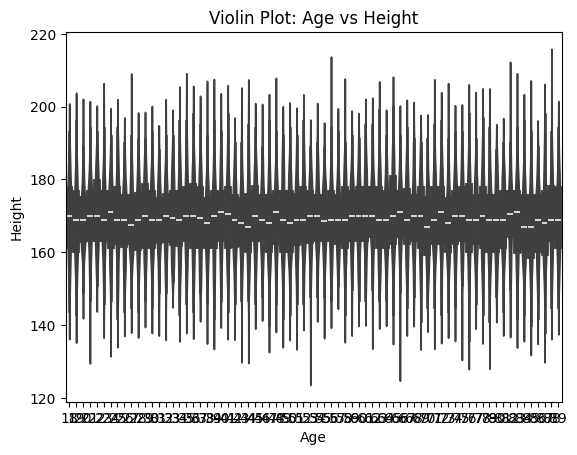

In [ ]:
#violin plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x="Age", y="Height", data=df1)
plt.title("Violin Plot: Age vs Height")
plt.xlabel("Age")
plt.ylabel("Height") #changed from Outcome to Height to match the y parameter
plt.show()


# **BAR PLOT**

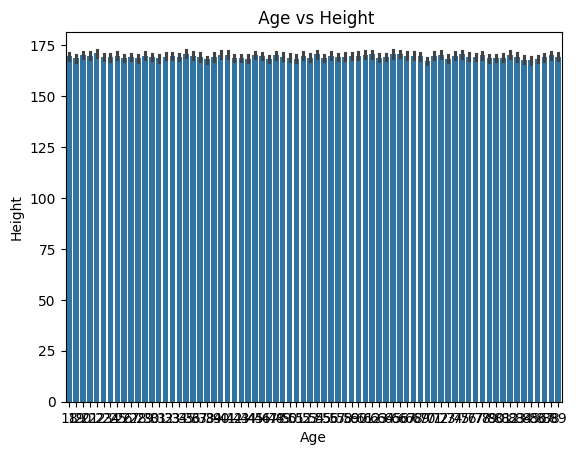

In [ ]:
# Bar Plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="Age", y="Height", data=df1)
plt.title(" Age vs Height")
plt.xlabel("Age")
plt.ylabel("Height")
plt.show()


# **LINE PLOT**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

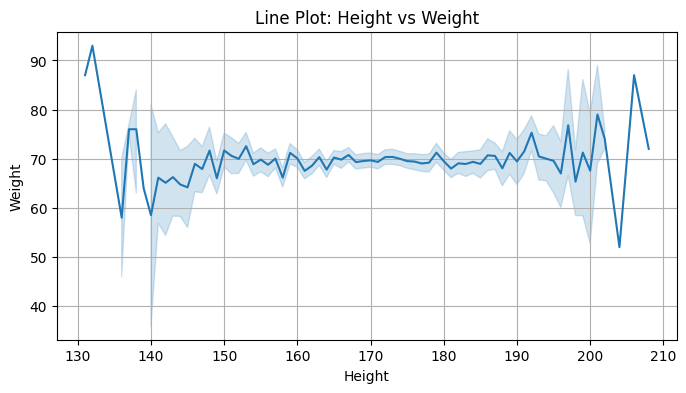

In [ ]:
# LINE PLOT
import matplotlib.pyplot as plt
df_clean= df1[['Height', 'Weight']].dropna()
plt.figure(figsize=(8, 4))
sns.lineplot(x='Height', y='Weight', data=df_clean)
plt.title('Line Plot: Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt

# **HEAT MAP**

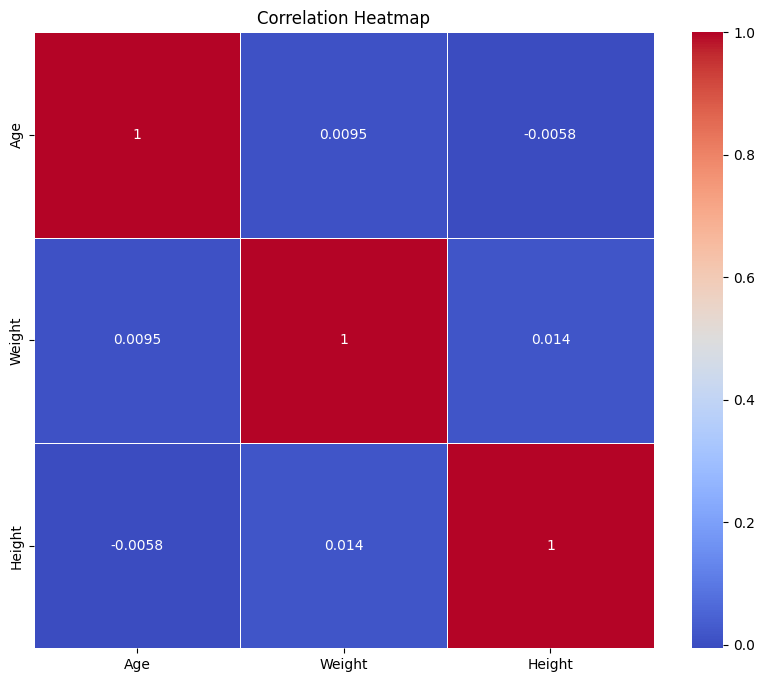

In [ ]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

 SKEWNESS

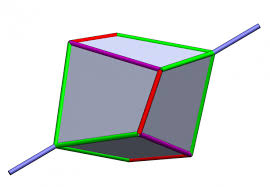# **SKEWING**

In [ ]:
df1.skew()

,0
Age,0.003846
Weight,-0.040705
Height,0.037133
Patient_ID_PAT000001,100.000000
Patient_ID_PAT000002,100.000000
...,...
Ethnicity_African,1.509633
Ethnicity_Arab,1.513572
Ethnicity_East Asian,1.529441
Ethnicity_European,1.513572


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns again after preprocessing
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' added

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(df1[categorical_cols])

# Create a new DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with the original DataFrame, dropping the original categorical columns
df_final = pd.concat([df1.drop(categorical_cols, axis=1), encoded_df], axis=1)

print(df_final.head())
print(df_final.info())


   Age  Weight  Height  Patient_ID_PAT000001  Patient_ID_PAT000002  \
0   69      61     157                   1.0                   0.0   
1   32      80     175                   0.0                   1.0   
2   89      50     175                   0.0                   0.0   
3   78      44     155                   0.0                   0.0   
4   38     101     160                   0.0                   0.0   

   Patient_ID_PAT000003  Patient_ID_PAT000004  Patient_ID_PAT000005  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   0.0                   0.0                   1.0   

   Patient_ID_PAT000006  Patient_ID_PAT000007  ...  Smoking_Status_Smoker  \
0                   0.0                   0.0  ...                    0.0  

# **FEATURE SELECTION**

In [ ]:
#feature selection
X = df.drop(columns='Outcome')
y = df['Outcome']

In [ ]:
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X, y)
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Top Features by Mutual Information:\n", scores)

# Or using RandomForest for feature importance
model = RandomForestClassifier()
model.fit(X, y)
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features by Random Forest:\n", importances)

Top Features by Mutual Information:
            Feature     Score
9    Comorbidities  0.012532
6   Treatment_Type  0.006271
2      Nationality  0.003866
5     Cancer_Stage  0.003784
12          Height  0.003317
0              Age  0.003273
7         Hospital  0.002942
8   Smoking_Status  0.001401
10       Ethnicity  0.001130
4      Cancer_Type  0.000000
3          Emirate  0.000000
1           Gender  0.000000
11          Weight  0.000000
Top Features by Random Forest:
            Feature  Importance
0              Age    0.152293
11          Weight    0.151823
12          Height    0.145113
4      Cancer_Type    0.085238
3          Emirate    0.078549
10       Ethnicity    0.066709
6   Treatment_Type    0.058818
5     Cancer_Stage    0.056108
7         Hospital    0.052161
9    Comorbidities    0.050143
8   Smoking_Status    0.044466
1           Gender    0.034231
2      Nationality    0.024349


# **TRAIN TEST SPLIT**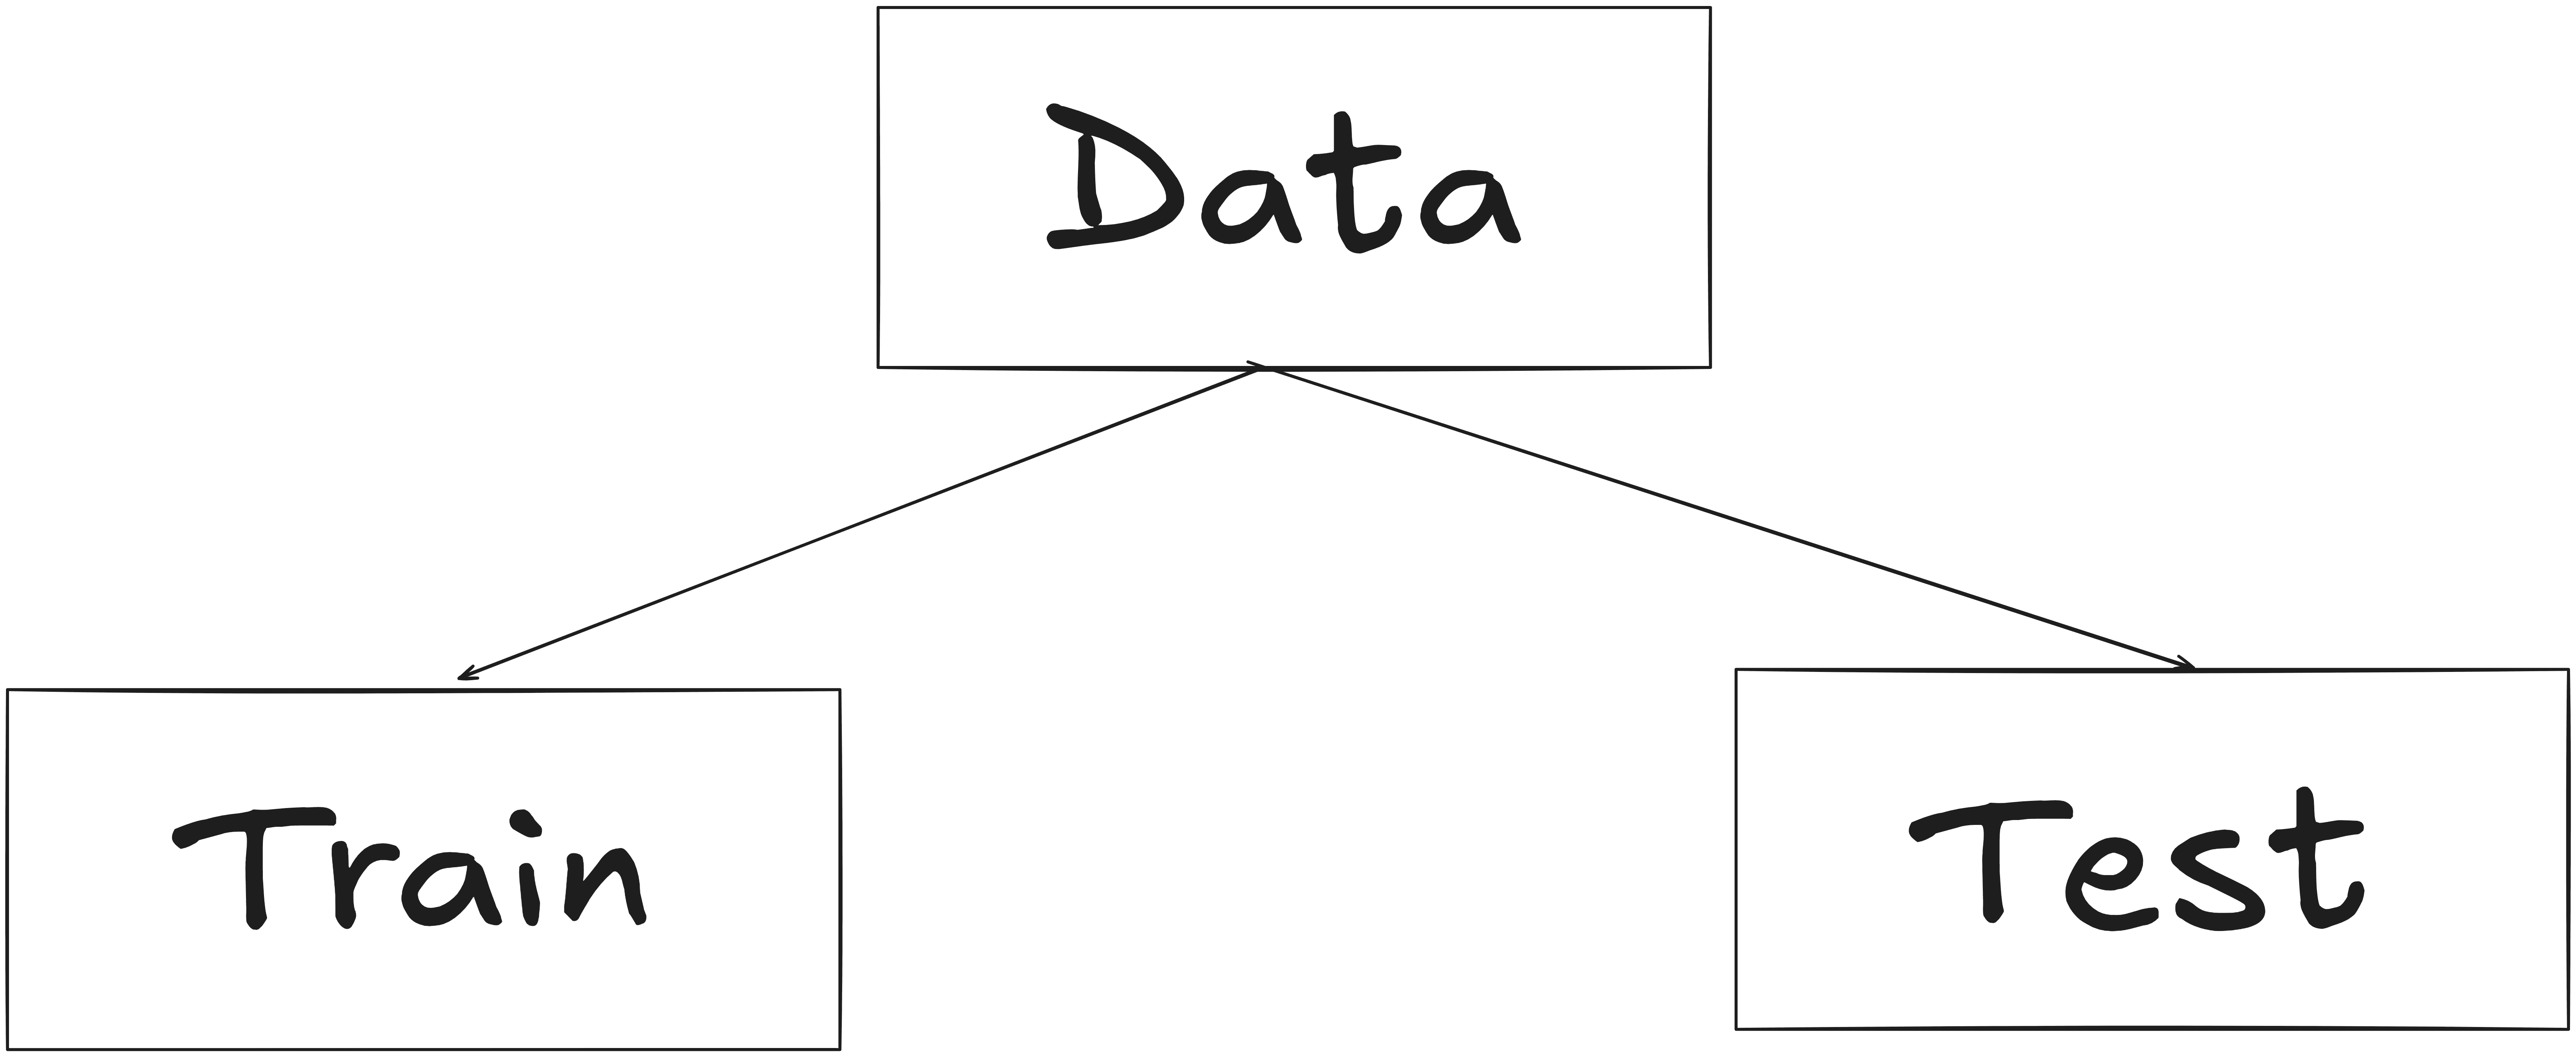

In [ ]:
#Now loading of the train and test data
x_train_selected,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **SCALING**

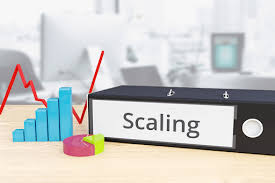

In [ ]:
scaler=StandardScaler()

In [ ]:
# Select only numeric features for scaling
numerical_features = data.select_dtypes(include=['number']).columns

# Apply StandardScaler to the numerical features only
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data[numerical_features])

# Create a DataFrame for the scaled numerical features
df_standard_scaled = pd.DataFrame(data_standard_scaled, columns=[f"{col}_zscore" for col in numerical_features])

# Combine original and scaled data for comparison
df_scaled = pd.concat([data, df_standard_scaled], axis=1)  # Removed df_min_max_scaled if it doesn't exist

# Display first few rows
print(df_scaled.head())

  Patient_ID  Age  Gender Nationality        Emirate Diagnosis_Date  \
0  PAT000001   69  Female     Emirati  Umm Al Quwain     2020-11-30   
1  PAT000002   32    Male     Emirati  Umm Al Quwain     2015-10-10   
2  PAT000003   89    Male     Emirati      Abu Dhabi     2018-02-13   
3  PAT000004   78  Female     Emirati      Abu Dhabi     2022-02-04   
4  PAT000005   38  Female     Emirati       Fujairah     2019-12-03   

  Cancer_Type Cancer_Stage Treatment_Type Treatment_Start_Date  ...  \
0       Liver           II      Radiation           2020-12-04  ...   
1    Leukemia          III        Surgery           2015-11-05  ...   
2       Liver          III      Radiation           2018-08-03  ...   
3        Lung          III      Radiation           2022-03-13  ...   
4  Pancreatic           II   Chemotherapy           2020-02-29  ...   

  Death_Date Cause_of_Death Smoking_Status Comorbidities    Ethnicity Weight  \
0        NaN            NaN     Non-Smoker           NaN     Europ

# **MODEL TRAINING AND EVALUATION**

In [ ]:
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'Random Forest':RandomForestClassifier()
}


In [ ]:
#Evaluatiion
print(f"\n({name}Results):")
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")


(Logistic RegressionResults):
Accuracy:0.447
Confusion Matrix:
[[  5 116  81]
 [ 29 584 361]
 [ 22 497 305]]
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.02      0.04       202
           1       0.49      0.60      0.54       974
           2       0.41      0.37      0.39       824

    accuracy                           0.45      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.41      0.45      0.43      2000



# **CONCLUSION**

The dataset reveals noticeable trends in cancer incidence across different years, genders, and cancer types in the UAE. Certain types of cancer appear more prevalent in specific demographics (e.g., breast cancer in females, prostate cancer in males), with fluctuations observed over the years. Such insights are critical for targeted health interventions and awareness campaigns.